# Face Recognition Using Eigenfaces

In [8]:
import os
import numpy as np
import pandas as pd
import face_recognition
import cv2
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image as im

In [9]:
eye = os.path.abspath(r"C:\Users\Siddarth\Desktop\haarcascade_eye.xml")
face = os.path.abspath(r"C:\Users\Siddarth\Desktop\haarcascade_frontalface_default.xml")



In [10]:
face_cascade = cv2.CascadeClassifier(face)
eye_cascade = cv2.CascadeClassifier(eye)


# Load data

In [21]:

# Module 2 Face Image Capture

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

id = input('enter user id')

sampleN=0;

while 1:

    ret, img = cap.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        sampleN=sampleN+1;

        cv2.imwrite("C:\\Users\\Siddarth\\Desktop\\tststsd\\Face-Recognition-using-eigen-faces-master\\dataset\\Student" +str(sampleN)+ ".jpg", gray[y:y+h, x:x+w])

        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

        cv2.waitKey(100)

    cv2.imshow('img',img)

    cv2.waitKey(1)

    if sampleN > 20:

        break

cap.release()

cv2.destroyAllWindows()
    



enter user id1


In [24]:
# neutral face
neutral = []

for i in range(21):
    i += 1
    img = im.open(f'dataset/Student{i}.jpg').convert('L')
    img = img.resize((58,49), im.LANCZOS)
    img2 = np.array(img).flatten() # vectorization
    neutral.append(img2)

In [25]:
faces_matrix = np.vstack(neutral)
faces_matrix.shape

(21, 2842)

In [26]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape

(2842,)

(21, 2842)

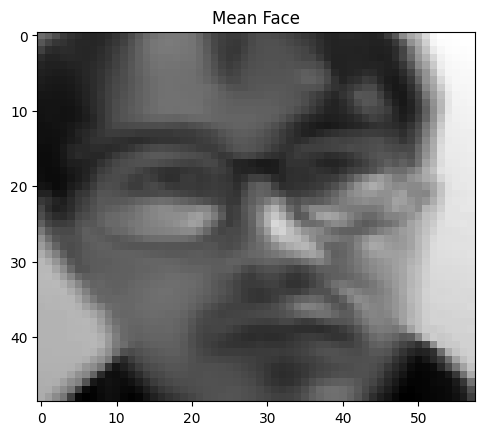

In [27]:
plt.imshow(mean_face.reshape(49,58),cmap='gray'); 
plt.title('Mean Face')

### normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape

## Compute Covariance

In [28]:

# Calculate covariance matrix
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

(2842, 2842)

## SVD 
To get eigenvectors.

In [29]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
eigen_vecs.shape

(2842, 2842)

## Visualize first 10 PCs / eigenfaces

C:\Users\Siddarth\AppData\Local\Temp\ipykernel_18184\294050156.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2,5,i


Text(0.5, 0.98, 'First 10 Eigenfaces')

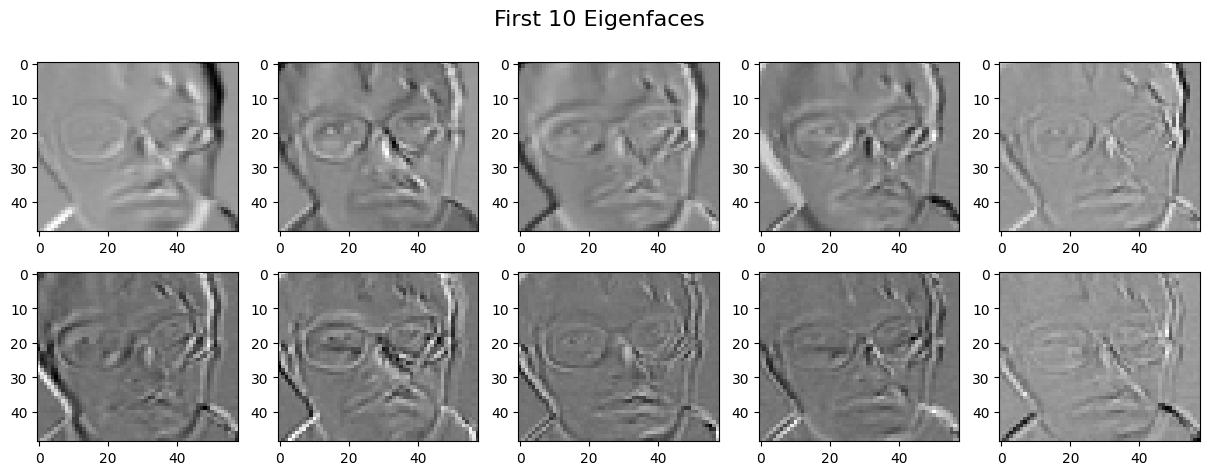

In [32]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i
                     +1)
    img = eigen_vecs[:,i].reshape(49,58)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

## Reconstruction with Eigenfaces

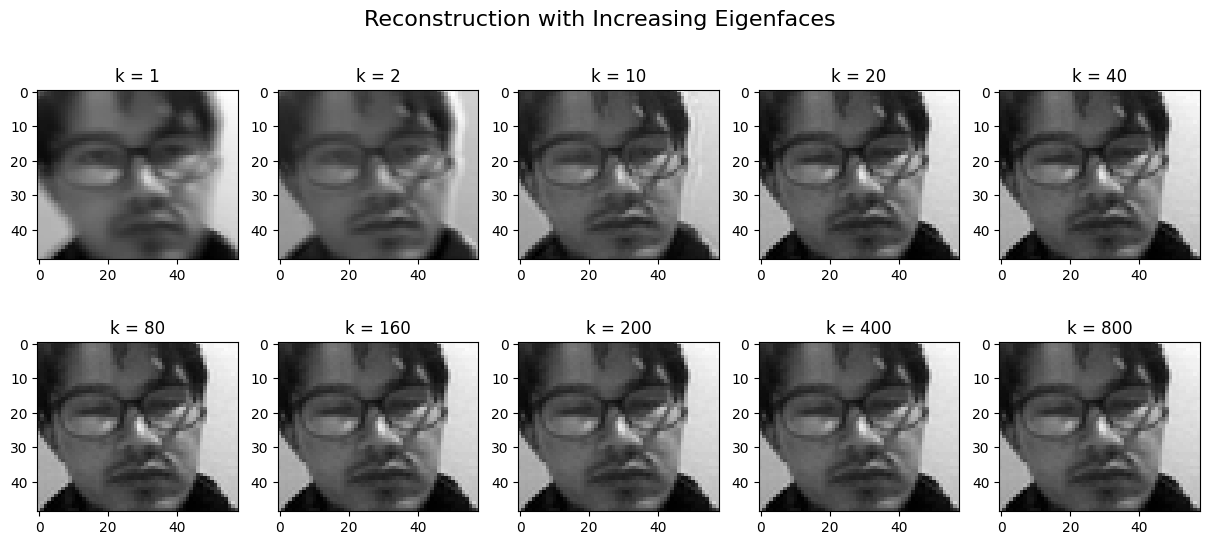

In [31]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[0,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(49,58)+mean_face.reshape(49,58),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);